<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Linear Regression

_Authors: Matt Brems (DC), Marc Harper (LA)_

---

<a id="learning-objectives"></a>
### Learning Objectives 
- Understand modeling, inference from models, and prediction
- Understand the framework of regression modeling
- Understand simple linear regression and linear relationships between variables
- Learn how to find the best slope and intercept for simple linear regression
- Be able to interpret the results of simple linear regression
- Understand the assumptions that simple linear regression makes

### Lesson Guide

- [Naive/Baseline Prediction](#naivebaseline-prediction)
- [Finding the "best" slope and intercept](#finding-the-best-slope-and-intercept)
- [Interpretation of SLR](#interpretation-of-slr)
- [Assumptions of SLR](#assumptions-of-slr)
- [Final notes on linear regression](#final-notes-on-linear-regression)
	- [Categorical predictors](#categorical-predictors)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

<a id="naivebaseline-prediction"></a>
## Naive/Baseline Prediction

What is the best prediction we can make for any data point if we can only use a single value?

How can we measure the success of our prediction?

<a id="lets-generate-some-data"></a>
### Let's generate some data

In [12]:
# create an x and a y that is 
# 50 plus 2 times x with some random noise around that
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x  + np.random.normal(0, 20, size=len(x))

In [13]:
df = pd.DataFrame({'X': x, 'Y': y})
df.head()

,X,Y
0,-5.000000,33.760338
1,-4.444444,50.436811
2,-3.888889,24.219842
3,-3.333333,56.313390
4,-2.777778,82.315003


If we know very little about our data and can only use a single value, we can still predict the mean.

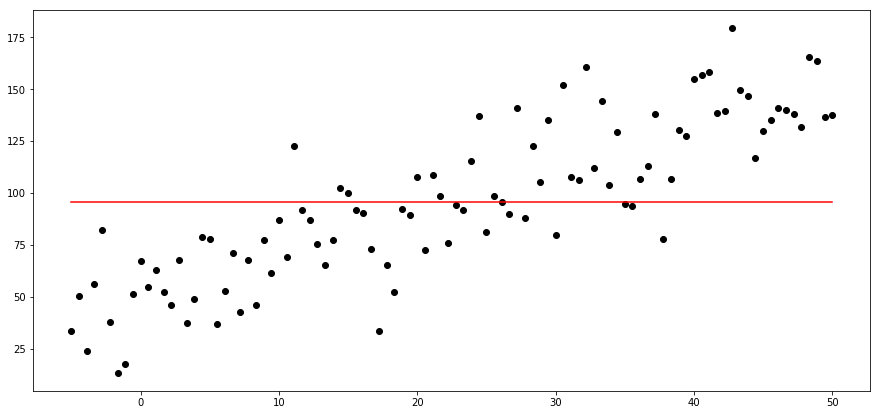

In [14]:
### Plot the data
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot((df['X'].min(), df['X'].max()),(np.mean(df['Y']), np.mean(df['Y'])), color='r');

We'll add that prediction to our DataFrame to use later

In [15]:
df['Mean_Yhat'] = df['Y'].mean()

In [16]:
df.head()

,X,Y,Mean_Yhat
0,-5.000000,33.760338,95.88078
1,-4.444444,50.436811,95.88078
2,-3.888889,24.219842,95.88078
3,-3.333333,56.313390,95.88078
4,-2.777778,82.315003,95.88078


<a id="finding-the-best-slope-and-intercept"></a>
## Finding the "best" slope and intercept

---

**1. If we want to find the "best" slope an intercept, we will need a criterion that defines what it means to be the "best".**

**2. We need to be able to numerically optimize (maximize or minimize) this criterion.**


<a id="residuals"></a>
### Residuals

The difference between the true value of $Y$ and the predicted value of $Y$ (denoted $\hat{Y}$, "Y-hat") is known as a "residual." For every value of $\hat{Y}_i$, there is an accompanying residual $\epsilon_i$.

**Note that the residual $\epsilon_i$ is the same as the error in our modeled linear relationship!**


<a id="residual-sum-of-squares-rss"></a>
### Residual sum of squares (RSS)

The most common way to define the "best fit line" is one that forces the ensures our residuals (a.k.a. errors) will be as close to zero as possible.

In fact, we see to minimize the *sum of squared residuals* or [residual sum of squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares). This minimizes the [mean squared error (MSE) or sum of squares of error (SSE)](https://en.wikipedia.org/wiki/Mean_squared_error).

### $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

This is also known as a **loss function**, where the "loss" here is the sum of squared residuals.

---

**Review: what is the difference between a parameter and a statistic?**

Below are two equations, one using parameters and one using statistics. What is the difference?

### $$ Y = \beta_0 + \beta_1 X \\
\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X $$

In [6]:
# Parameters represent the values in the true populations
# Statistics are our estimation of the true parameters from the sample

Remember our naive prediction? Let's see how it does.

In [17]:
# Calculate MSE
df['Mean_Yhat_SE'] = np.square(df['Y'] - df['Mean_Yhat'])
df['Mean_Yhat_SE'].mean()

1450.2194726799376

<a id="minimizing-the-mse"></a>
### Minimizing the MSE

For simple linear regression [we can derive the intercept and slope that minimize the RSS algebraically](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line). 

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

The equations for the intercept and slope that minimize the RSS is:

### $$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} \\
\hat{\beta}_1 = r_{XY} \frac{s_Y}{s_X}$$

Our simple linear regression is an **estimator of the expected value (mean) of $Y$**.

> **Note:** Estimators are mathematical functions or formulas that yield an *estimate*. For example, an estimator might be the sample mean whereas the estimate is the value of the sample mean from our data set.

<a id="calculate-beta-coefficients-by-hand"></a>
### Calculate beta coefficients by hand

In [18]:
y_bar = df['Y'].mean()
x_bar = df['X'].mean()
std_y = df['Y'].std()
std_x = df['X'].std()
r_xy = df.corr().loc['X','Y']
beta_1 = r_xy*(std_y/std_x)
beta_0 = y_bar - beta_1*x_bar

In [19]:
df['Linear_Yhat'] = beta_0 + beta_1*df['X']

In [20]:
np.square(df['Y'] - df['Linear_Yhat']).mean()

392.3258515726902

**How does our new MSE compare to our old MSE?**

In [11]:
# Our new MSE is much smaller. This means that on average our residuals are smaller and we have a better fit.

#### We can now plot our line

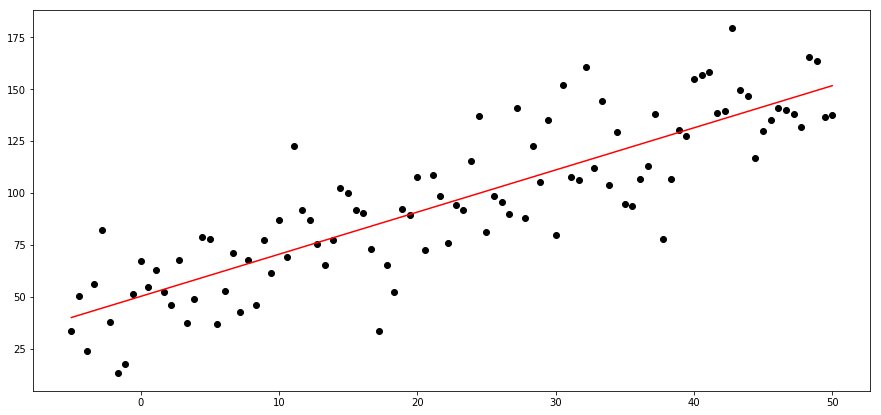

In [21]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot(df['X'], df['Linear_Yhat'], color='r');

#### We can also plot our residuals

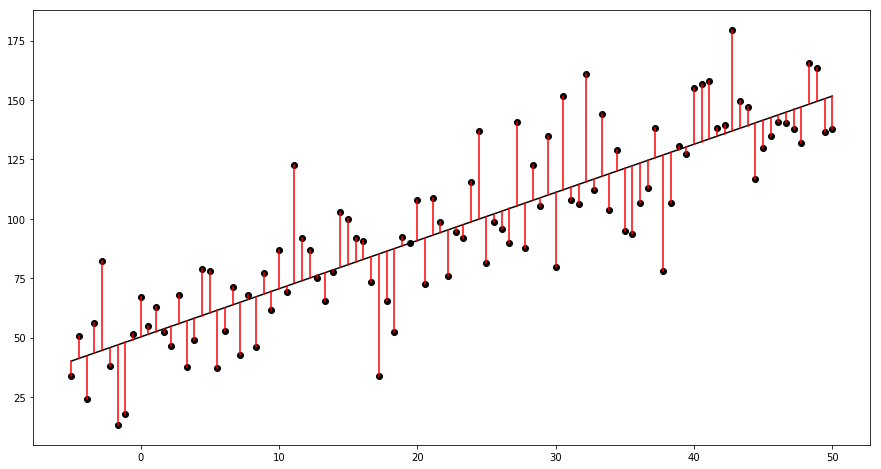

In [22]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=df['X'], y=df['Y'], c='k')
ax.plot(df['X'], df['Linear_Yhat'], color='k');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['X'], row['X']), (row['Y'], row['Linear_Yhat']), 'r-')

<a id="interpretation-of-slr"></a>
## Interpretation of SLR

---

The simple linear regression estimators described above have really nice properties:

1. They are unbiased. (a.k.a. the statistics will on average equal the true parameter value)
2. Among all unbiased estimators, the estimators above have the smallest possible variance.
3. They are consistent. (a.k.a. as your sample size n goes to infinity, the statistic converges to the true parameter value)

**However, these are just mathematical properties.** They do not take into account real-world situations. For example, suppose I want to use a SLR model to predict my commute time and I get the model:

    [commute time] = 8 * [number of Metro stops] - 10

In this case, my commute time is estimated to be negative if I go zero stops or one stop on the Metro. If I were to interpret my intercept, I might say "If I travel zero Metro stops on my way to work, I expect to commute -10 minutes." Of course, this is nonsense; you can't have a negative commute time!

**What this means:** 

When building a model, make sure your model makes sense! You are responsible for the interpretation of the model. All the computer will do is optimize. You may not do anything wrong when you fit a model, but make a note that there are  shortcomings to the framework.

<a id='assumptions'></a>

<a id="assumptions-of-slr"></a>
## Assumptions of SLR

---

There are some critical assumptions involved in SLR that you must be aware of:

1. **Linearity:** Y and X must have an approximately linear relationship.
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any i != j.
3. **Normality:** The errors (residuals) follow a Normal distribution.
4. **Equality of Variances** (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)

The mnemonic **LINE** is a useful way to remember these four assumptions.

Lengthier discussions of the four main assumptions and how one can evaluate or test for each of these [can be found here](http://people.duke.edu/~rnau/testing.htm).

If all four assumptions are true, the following holds: 

### $$ Y_i \text{ ~ } N(\beta_0 + \beta_1 X_i, \sigma) $$

# Multiple Linear Regression

<a id='load-data'></a>

## Load the real estate data

---

Over the course of this lesson we will be constructing a simple linear regression and then extend this to multiple linear regression. Included in the datasets folder is a very simple dataset on real estate prices.

**Load the data using pandas.**

In [24]:
house_csv = '../datasets/housing-data.csv'

house = pd.read_csv(house_csv)
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


The columns are:

    sqft: the size of the house in sq. ft
    bdrms: number of bedrooms
    age: age in years of house
    price: the price of the house
    
**Convert `price` to be in units of 1000 (thousands of dollars).**

In [25]:
house['price'] = house.price.map(lambda x: x/1000.)
house.head(2)

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9


<a id='slr-to-mlr'></a>

## From simple linear regression (SLR) to multiple linear regression (MLR)

---

The TL;DF of multiple linear regression:

> Instead of using just one predictor to estimate a continuous target, we build a model with multiple predictor variables. You will be using MLR way more than SLR going forward.

These variables will be represented as columns in a matrix (often a pandas dataframe).

**Brainstorm some examples of real-world scenarios where multiple predictors would be beneficial. Can you think of cases where it might be detrimental?**

In [19]:
# If Y is a function of multiple things then it makes sense to expand the equation
# For example: predicting the weather tomorrow from pressure and temperature instead of just one of them
# MLR could be detrimental if the predictors we are including aren't relevant. Why
# include predictors in our formula that do not have a real impact: more on this later!

<a id='assumptions'></a>

## Assumptions of MLR

---

Like SLR, there are assumptions associated with MLR. Luckily, they're quite similar to the SLR assumptions.

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_i$.
2. **Independence:** Errors (residuals) $\epsilon_i$ and $\epsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution.
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
5. **Independence of Predictors**: The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

The mnemonic LINEI is a useful way to remember these five assumptions.

<a id='fit-mlr'></a>

## Fitting a multiple linear regression

---

The formula for computing the $\beta$ values in multiple regression is best done using linear algebra. We will cover the derivation, but for more depth  [these slides are a great resource](http://statweb.stanford.edu/~nzhang/191_web/lecture4_handout.pdf).

$X$ is now a _matrix_ of predictors $x_1$ through $x_i$ (with each column a predictor), and $y$ is the target vector we are seeking to estimate. There is still only 1 *estimated* variable!

### $$ \hat{y} = X \beta$$

**Note:** $\beta$ in the formula above is a *vector* of coefficients now, rather than a single value.

In different notation we could write $\hat{y}$ calculated with:

### $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

---

<a id='mlr-beta-derivation'></a>

### Deriving the $\beta$ coefficients

$\beta$ is solved with the linear algebra formula:

### $$ \beta = (X'X)^{-1}X'y $$

Where $X'$ is the transposed matrix of original matrix $X$ and $(X'X)^-1$ is the inverted matrix of $X'X$.



The equation using true $y$ is:

### $$ y = X \beta + \epsilon $$

Again, $\epsilon$ is our vector of errors, or residuals.

We can equivalently formulate this as in terms of the residuals:

### $$ \epsilon = X \beta - y $$

Our goal is to minimize the sum of squared residuals. The sum of squared residuals is equivalent to the dot product of the vector of residuals:

### $$ \sum_{i=1}^n \epsilon_i^2 = 
\left[\begin{array}{cc}
\epsilon_1 \cdots \epsilon_n
\end{array}\right] 
\left[\begin{array}{cc}
\epsilon_1 \\ \cdots \\ \epsilon_n
\end{array}\right] = \epsilon' \epsilon
$$

Therefore we can write the sum of squared residuals as:

### $$ \epsilon' \epsilon = (X \beta - y)' (X \beta - y) $$

Which becomes:

### $$ \epsilon' \epsilon = y'y - y'X\beta - \beta' X' y + \beta' X' X \beta $$

Now take the derivative with respect to $\beta$:

### $$ \frac{\partial \epsilon' \epsilon}{\partial \beta} = 
-2X'y + 2X'X\beta$$

We want to minimize the sum of squared errors, and so we set the derivative to zero and solve for the beta coefficient vector:

### $$ 0 = -2X'y + 2X'X\beta \\
X'X\beta = X'y \\
\beta = (X'X)^{-1}X'y$$

<a id='code-mlr'></a>

### Code a MLR

**First, we need to create the "design matrix" of our predictors.**

The first column will be a column of all 1s (the intercept) and the other columns will be `sqft`, `bdrms`, and `age`.

This is easiest to do with pandas: add a column for the intercept first, then extract the matrix using with `.values`.

In [26]:
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399.9
1,1600,3,28,329.9
2,2400,3,44,369.0
3,1416,2,49,232.0
4,3000,4,75,539.9


In [28]:
X = house[['sqft', 'bdrms', 'age']]
X['intercept'] = 1.
# reordering columns:
X = X[['intercept', 'sqft', 'bdrms', 'age']].values
print(X[0:3, :])

[[  1.00000000e+00   2.10400000e+03   3.00000000e+00   7.00000000e+01]
 [  1.00000000e+00   1.60000000e+03   3.00000000e+00   2.80000000e+01]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00   4.40000000e+01]]


### Solve for the beta coefficients

We are still predicting `price`. Implement the linear algebra equation to solve for the beta coefficients. 

### $$ \beta = (X'X)^{-1}X'y $$

**Tips:**

The transpose of a matrix is calculated by appending `.T` to the matrix:

    X.T

Matrices multipled in the formula should be done with the "dot product":

    np.dot(mat1, mat2)

Inverting a matrix is done using:

    np.linalg.inv()

In [30]:
price = house.price.values
beta_vec = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), price)
print(beta_vec)

[  9.24516278e+01   1.39334847e-01  -8.62147046e+00  -8.12178776e-02]


**Confirm that these betas are the same as the ones using `sklearn.linear_model.LinearRegression`**

```python
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, price)

print linreg.coef_
```

In [32]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, price)

print(linreg.coef_)

[  9.24516278e+01   1.39334847e-01  -8.62147046e+00  -8.12178776e-02]


**Calculate predicted $\hat{y}$ with your $X$ predictor matrix and $\beta$ coefficients.**

In [33]:
yhat = np.dot(X, beta_vec)

**Calculate the RMSE of the multiple regression model.**

In [37]:
print('Multiple regression MSE:', np.sqrt(np.mean(np.square(price - yhat))))

Multiple regression MSE: 63.8999936136


<a id='additional-resources'></a>

## Additional resources

---

[Maximum likelihood estimation](https://onlinecourses.science.psu.edu/stat504/node/28)

<a id='intro'></a>

##  `sklearn` & `statsmodels`

---

This lesson intends to introduce the modeling packages `sklearn` and `statsmodels` in the context of regression modeling. These are both powerful python packages with different strengths. 

In general:
- **`sklearn`** is the *machine learning* package
- **`statsmodels`** is the *statistics* package

Though the terms have immense overlap, machine learning tends to be more prediction focused while statistics is more inference focused. 

**Remember: even with all the power provided by these modeling tools, it's never a replacement for good EDA!**

---

### A preface on modeling

As we venture down the path of modeling, it can be difficult to determine which choices are "correct" or "incorrect".  A primary challenge is to understand how different models will perform in different circumstances and different types of data. It's essential to practice modeling on a variety of data.

As a beginner it is essential to learn which metrics are important for evaluating your models and what they mean. The metrics we evaluate our models with inform our actions.  

*Exploring datasets on your own with the skills and tools you learn in class is highly recommended!*

<a id='documentation'></a>

## `sklearn` and `statsmodels` documentation

---

Get familiar with looking up things in the `sklearn` and `statsmodels` documentation. You are going to be doing a lot of it over the course of DSI and beyond.

[The statsmodels documentation can be found here.](http://statsmodels.sourceforge.net/devel/) Many recommend using the bleeding-edge version of statsmodels. [For that you can reference the code on github.](https://github.com/statsmodels/statsmodels/)

[The sklearn documentation can be found here.](http://scikit-learn.org/stable/documentation.html)

The packages have fairly different approaches and syntax for constructing models. Below are examples for linear regression in each package:
* [Linear regression in statsmodels](http://statsmodels.sourceforge.net/devel/examples/#regression)
* [Linear regression in scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

If you haven't yet, familliarize yourself with the format of the documentation.

<a id='sklearn-background'></a>

## Background: Scikit-learn / sklearn

---

<img src="https://avatars1.githubusercontent.com/u/25111?v=3&s=200" style="float: left; margin: 0 25px;"> Scikit-learn was founded in 2007 as a Google summer of code project by [David Cournapeau](https://github.com/cournape).  Later in 2007, Matthieu Brucher published his thesis on Scikit-learn.  Since then, the Scikit-learn project has taken on a worldwide team of owners. A great high level overview of the project can be found in a 2011 publication in [Journal of Machine Learning Research 12 (2011) 2825-2830](http://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf).

Skikit-learn is part of the Scipy family of "kits".  Explore some of the [other projects](https://scikits.appspot.com/scikits) in this family.
<br clear="all"><br>


**Scikit-learn provides a wide variety of machine learning models, including:**

- Linear regression
- Logistic regression
- Support Vector Machines
- Classification And Regression Tree Models
- Naive Bayes
- Clustering Models (K-Means, Hierarchical, DBScan)

**It also handles the construction of typical machine learning pipeline utilities for:**
- Model evaluation
- Model selection
- Preprocessing
- Natural Language Processing
- Dimensionality Reduction

**Scikit-learn comes with a ton of datasets that are cleaned and formatted to work with the models provided by their library:**
- Boston Housing
- Iris Flowers
- Diabetes Diagnostics
- Various sample images (for classification)
  - Faces
  - MINIST (handwriting examples)
- Random data generators
- Spam examples
- Newsgroup classfication

[Read more about Scikit-learn datasets](http://scikit-learn.org/stable/datasets/)

---

### `sklearn` under the hood

- **Numpy**:  The base for data structures and transformations. Input data is represented as numpy arrays, integrating seamlessly with other scientific Python libraries. Numpy’s viewbased memory model limits copies, even when binding with compiled code.  It also provides basic arithmetic and linear algebra operations.<br><br>

- **Scipy**:  Efficient algorithms for linear algebra, sparse matrix representation, special functions and basic statistical functions.<br><br>

- **Cython**:  A language for combining C with Python. Cython makes it easy to reach the performance of compiled languages with Python-like syntax and high-level operations.

<a id='sklearn-first-steps'></a>

## First steps with `sklearn`: loading the data

---

We will load the boston housing dataset using sklearn and then construct and fit a linear regression model on the data. 

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Don't forget to turn on plotting display in the notebook
%matplotlib inline 

**Load the boston housing data with the `datasets.load_boston()` function.**

In [39]:
data = datasets.load_boston()

print(data.DESCR) # This is like a data dictionary!

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

**The data object we've loaded has attributes with the features, target variable, and design matrix:**

In [40]:
print(data.feature_names)
print(data.data[0:3])
print(data.target[0:3])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
    5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
    1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
    4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
    9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
    4.69000000e-01   7.18500000e+00   6.11000000e+01   4.96710000e+00
    2.00000000e+00   2.42000000e+02   1.78000000e+01   3.92830000e+02
    4.03000000e+00]]
[ 24.   21.6  34.7]


### Putting the data in pandas for convenience

Our target is what we are predicting.  Sometimes this is called the **response variable**.

The target and the data are what we use to train, or **fit** the model with.

Scikit-learn has already split our data into the **predictors** and **response** for us. It has also stored the names of the features in a separate array. 

So we can print things like the header of the data it will be more convenient to have our data in a pandas dataframe.

**Use the predictors and the feature names to create a pandas dataframe.**

In [41]:
import numpy as np
import pandas as pd

# Create dataframe of main data to use as predictors (later). AKA "X"
df = pd.DataFrame(data.data, columns=data.feature_names)

# target vector (MEDV)
target = data.target

print(df.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Our training set is a matrix / dataframe with many variables (**CRI, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B,** and **LSTAT**). We have **13** predictors with **506** rows/observations.

Our target is a vector that represents a single variable (**MEDV**), which has exactly the same number of observations as our training set: **506**.

> _Training (fit) and target datasets must always match in length!_

### Index correspondence between target and predictors

Row 0 of **`df`**, our training data, is:

```
[0.00632	18.0	2.31	0.0	0.538	6.575	65.2	4.0900	1.0	296.0	15.3	396.90	4.98]
```

This corresponds to the 0 index obersvation in our target vector:
```
24.0
```

These two seperate datasets (a matrix/dataframe, and a vector), are what we will use in the `.fit(predictors, target)` function in sklearn's models.  

- The training data is 2D with dimensions: `n_samples x n_features`
- The response is 1D with dimensions: `n_samples`, matching the `n_samples` of the training data.

<a id='first-model-sklearn'></a>

## Fitting our 1st model with `sklearn`

---

Now let's fit a linear regression model with the housing data. 

First let's visually identify some predictors that seem to have a relationship with house value. 

**Plot RM and LSTAT against the target variable with seaborn.** 

> _Note: If for some reason scikit-learn crashes the jupyter notebook, have conda remove mkl (there's an issue with the newer build on some systems)._

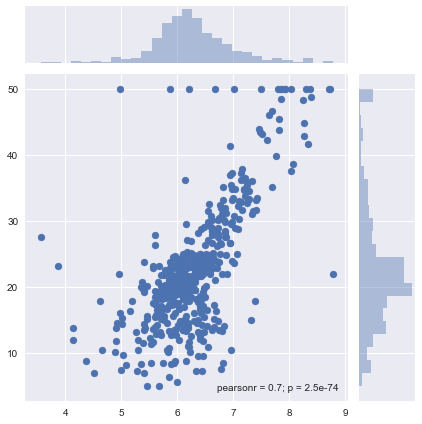

In [42]:
sns.jointplot(df.RM.values, target)

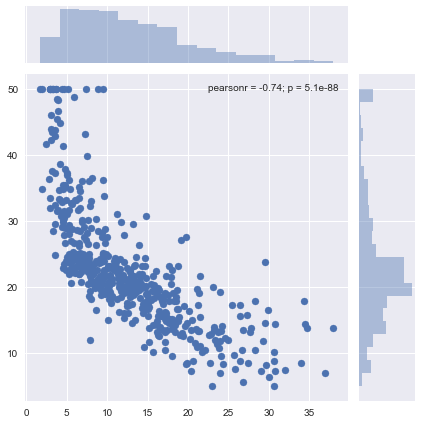

In [43]:
sns.jointplot(df.LSTAT.values, target)

**Below we fit a linear regression model predicting `MEDV` (the target vector) from `RM`.**

> **Note:** sklearn models expect the predictor matrix to be 2D and the target to be 1D.

In [44]:
lm = linear_model.LinearRegression()

X = df[["RM"]]
y = target 

model = lm.fit(X, y)

**Make predictions for the X matrix using `.predict(X)`, and score the model ($R^2$) using `model.score(X, y)`.**

Plot the predicted values against the true values of the target, and print the model $R^2$.

> **`.score(predictors, target)`**: a class method / function that returns the coefficient of determination R^2 of the prediction (for regression models).  Found in many models in scikit-learn (but not all).

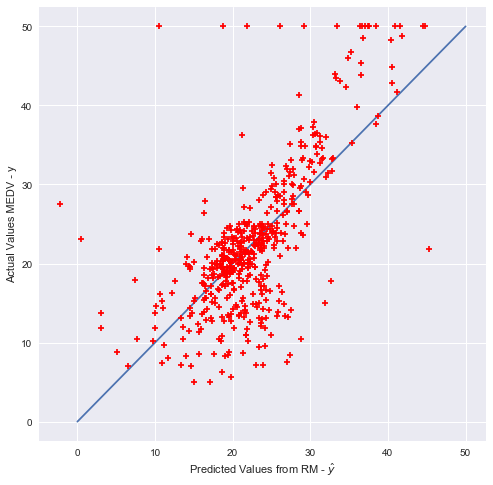

score:  0.483525455991


In [45]:
predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

print("score: ", score)

**What can this plot tell us about the model?**

In [9]:
# If the points all fell on a diagonal line then we would have a perfect fit.
# The more "cloud-like" this becomes, the worse our fit will be. We can tell
# that there are certainly some odd observations where the predictions and
# the target values are way off.

<a id='model-attributes'></a>

## sklearn model class attributes

---

After you run `.fit()`, a sklearn model object often contains a variety of calculated metrics, coefficients, and other information. Which metrics and attributes are present will depend on the model – consult the documentation for specifics. 

Attributes in the `LinearRegression` object include:
- **`.coef_`**: property containing the coeffients for the predictor variables
- **`.intercept_`**: value of the intercept

**Print out the beta coefficient and intercept for the model.**


In [10]:
print(model.coef_)
print(model.intercept_)

[ 9.10210898]
-34.6706207764


**What does the coefficient mean in the context of your model?**

In [11]:
# A 1 unit increase in variable RM corresponds to a 9.10 unit increase in the estimate of MEDV

<a id='common-metrics'></a>

## Review: common metrics for evaluating regression models

---

The [root mean squared error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) is a standard measure of model performance. It is the square root of the mean of the sum of squared residuals:

### $$ \operatorname{RMSE}= \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2} $$

The smaller the root mean squared error, the better your model fits the data. 

You are already familiar with the [coefficient of determination $R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination):

### $$ R^2 = 1 - \frac{SS_{reg}}{SS_{tot}} $$

Where the regression sum of squares is the sum of squared residuals for our model:

$SS_{reg}=\sum_i (\hat{y} -\bar{y})^2$

And the total sum of squares is the sum of squared residuals for the *baseline* model. This is essentially the variance of our target.

$SS_{tot} = \sum_i (y_i-\bar{y})^2$

$R^2$ is the most common metric to evaluate a regression and is the default scoring measure in sklearn. When we cover classification models, the `.score` function instead defaults to accuracy.


**Calculate the RMSE of your model by leveraging `sklearn.metrics.mean_squared_error`.**

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

print(np.sqrt(mean_squared_error(target, predictions)))
print(r2_score(target, predictions))

6.60307138922
0.483525455991


<a id='mlr-sklearn'></a>

## Fit a MLR using sklearn

---

We have fit a simple linear regression predicting `MEDV ~ RM + 1` (where the 1 represents the intercept). Use the same sklearn process and `LinearRegression` model to estimate the target with both `RM` and `LSTAT`.

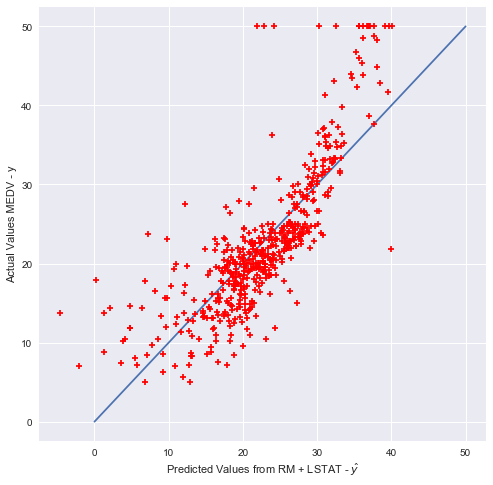

score:  0.63856160626


In [48]:
lm = linear_model.LinearRegression()

X = df[["RM","LSTAT"]].values
y = target 

model = lm.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM + LSTAT - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

print("score: ", score)

**Print out the coefficients from this MLR model and interpret them.**

In [14]:
print(model.coef_)

[ 5.09478798 -0.64235833]


In [15]:
# For a 1-unit increase in RM (holding constant LSTAT), there is a 5.09 increase in MEDV
# For a 1-unit increase in LSTAT (holding constant RM), there is a -0.642 increase in MEDV

<a id='negative-r2'></a>

## A note on negative $R^2$ values

---

Over the course of this class you will encounter negative $R^2$ values. This may seem impossible, and it is in the standard scenario where we are calculating the $R^2$ score on the data we fit the model with.

However, if you fit your model on one sample of data, *then score the model on new data not used to fit the model*, it is possible to end up with negative $R^2$.

**What does it mean to have a negative $R^2$?**

Remember that $R^2$ is 1 minus the error of your regression model divided by the error of the baseline model. A negative $R^2$ means that the regression model is performing *worse* than the baseline model. In the context of fitting our data on one sample of data and scoring on another sample, this means that we would have been better off making predictions on the test sample just using the mean of the target variable in our training set.

We will return to the topic of negative $R^2$ when we talk about training and testing sets and cross-validation.

<a id='statsmodels-intro'></a>

## Fitting a linear regression using `statsmodels`

---

Now we will fit the linear regression model predicting the target from `RM` and `LSTAT`, but this time using `statsmodels`.

The format looks like:

```python
import statsmodels.api as sm

X = df[["RM","LSTAT"]].values
# manually add the intercept column:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict()
```

First we load the statsmodels api module, which contains the ordinary least squares `OLS` model class. The statsmodels process is slightly different:
- We manually make a new column for the intercept in our design matrix $X$.
- The $y$ target variable comes before the $X$ predictor
- The data is provided during the instantiation of the model object, then fit is called without the data.

**Fit the model using statsmodels.**

/Users/jmpounders/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


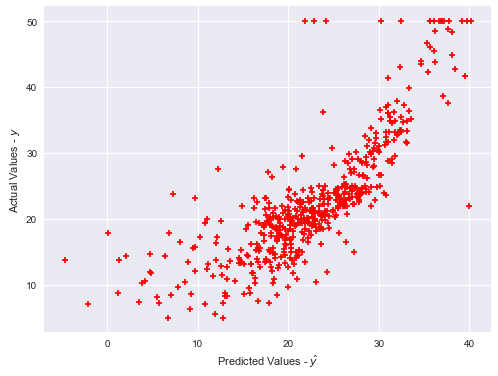

MSE: 30.5124687773


In [16]:
import statsmodels.api as sm

X = df[["RM","LSTAT"]].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print("MSE:", mean_squared_error(y, predictions))

<a id='statsmodels-summary'></a>

### Statsmodels `.summary()`  function

Once a model is fit with statsmodels, you can print out a variety of summary statistics, metrics, and properties of the model using the `model.summary()` function.

You are already familiar with some of the information available in the summary:
- R-squared
- Number of observations
- Coefficients for the variables and the intercept (const)
- Standard errors of the coefficients, t-statistics, p-values, and confidence intervals

There is also a variety of different metrics that we have not yet talked about. Don't hesitate to look up any of the statistics online if you are curious.

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Fri, 13 Oct 2017   Prob (F-statistic):          7.01e-112
Time:                        12:16:08   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0948      0.444     11.463      0.000       4.222       5.968
x2            -0.6424      0.044    -14.689      0.000      -0.728      -0.556
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='independent-practice'></a>

## Independent practice

---

Using either scikit-learn or statsmodels (or both, if you prefer), build a model using any set of **continuous** variables of your choice. Evaluate your model using $R^2$. Describe what the $R^2$ means.

In [18]:
# TWO VARIABLES

X = df[["TAX","AGE","CRIM"]].values
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = target

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     59.41
Date:                Fri, 13 Oct 2017   Prob (F-statistic):           7.01e-33
Time:                        12:16:08   Log-Likelihood:                -1763.4
No. Observations:                 506   AIC:                             3535.
Df Residuals:                     502   BIC:                             3552.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0157      0.003     -5.629      0.000      -0.021      -0.010
x2            -0.0574      0.015     -3.939      0.000      -0.086      -0.029
x3            -0.1679      0.051     -3.324      0.001      -0.267      -0.069
const         33.5027      1.148     29.185      0.000      31.247      35.758
==============================================================================
Omnibus:                      204.159   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              699.355
Skew:                           1.906   Prob(JB):                    1.37e-152
Kurtosis:                       7.317   Cond. No.                     1.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# The model has an R2 of 0.262, which means that the three predictor variables I 
# have chosen explain 26.2% of the variance in the target variable not
# explained by the baseline model.

<a id='patsy'></a>

## A brief introduction to `patsy` formulas (optional)

---

Why slice and dice the data yourself when you just write a formula that defines your model?

The `patsy` package allows you to specify the construction of your model using a formula string, and then returns the matrices required to fit the model.

Let's say we wanted to predict `CRIM` from `TAX`, `AGE` and `ZN`. We would write a string formula like so:

```
formula = 'CRIM ~ TAX + AGE + ZN'
```

Then, after importing patsy, we can generate our target and predictor matrix by supplying the formula and the dataframe that contains the corresponding columns.

```python
import patsy

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
```

In [20]:
import patsy

formula = 'CRIM ~ TAX + AGE + ZN'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

In [21]:
y.head()

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905


In [22]:
X.head()

,Intercept,TAX,AGE,ZN
0,1.0,296.0,65.2,18.0
1,1.0,242.0,78.9,0.0
2,1.0,242.0,61.1,0.0
3,1.0,222.0,45.8,0.0
4,1.0,222.0,54.2,0.0


You'll notice that with `return_type='dataframe'` patsy's `.dmatrices()` function returns two pandas dataframes, one for the target and one for the design matrix. 

You'll also notice that it creates an intercept column by default. **If you do not want it to create an intercept column, add a -1 to the formula string**

In [23]:
formula = 'CRIM ~ TAX + AGE + ZN -1'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

X.head()

,TAX,AGE,ZN
0,296.0,65.2,18.0
1,242.0,78.9,0.0
2,242.0,61.1,0.0
3,222.0,45.8,0.0
4,222.0,54.2,0.0


You can then feed in these matrices into statsmodels or sklearn. It is generally a good practice to convert your target matrix into a 1D vector, especially when using sklearn.

> **Tip:** The `.ravel()` function for numpy arrays will "unravel" a multidimensional matrix into a one dimensional vector of values.

In [24]:
formula = 'CRIM ~ TAX + AGE + ZN'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

y = y.values.ravel()

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     86.44
Date:                Fri, 13 Oct 2017   Prob (F-statistic):           4.22e-45
Time:                        12:16:08   Log-Likelihood:                -1700.7
No. Observations:                 506   AIC:                             3409.
Df Residuals:                     502   BIC:                             3426.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6282      1.177     -8.179      0.000     -11.941      -7.315
TAX            0.0276      0.002     12.870      0.000       0.023       0.032
AGE            0.0271      0.015      1.829      0.068      -0.002       0.056
ZN             0.0079      0.016      0.485      0.628      -0.024       0.040
==============================================================================
Omnibus:                      635.292   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63803.854
Skew:                           6.154   Prob(JB):                         0.00
Kurtosis:                      56.617   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""